In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from textblob import TextBlob
import nltk
import re
import string

#### Loading the dataset

In [2]:
train_data=pd.read_csv('/kaggle/input/sentiment-analysis/Train.csv')
test_data=pd.read_csv('/kaggle/input/sentiment-analysis/Test.csv')
valid_data=pd.read_csv('/kaggle/input/sentiment-analysis/Valid.csv')

In [3]:
train_data

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


#### Pre-Processing of text

In [4]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Lowercase conversion
    text = text.lower()
    
    # Remove URLs
    text = re.sub("https?://\S+|www\.\S+", "", text)
    
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), "", text)
    
    # Remove stop words
    text = " ".join([word for word in text.split() if word not in stop_words])
    
    # Correct spelling
    #text = str(TextBlob(text).correct())
    # Remove words containing numbers
    text = re.sub('\w*\d\w*', "", text)
    
    return text


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
train_data['text']=train_data['text'].apply(preprocess)
test_data['text']=test_data['text'].apply(preprocess)
valid_data['text']=valid_data['text'].apply(preprocess)

In [6]:
train_data

,text,label
0,grew b watching loving thunderbirds mates sch...,0
1,put movie dvd player sat coke chips expectatio...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movies bor...,0
4,im die hard dads army fan nothing ever change ...,1
...,...,...
39995,western union something forgotten classic west...,1
39996,movie incredible piece work explores every noo...,1
39997,wife watched movie plan visit sicily stromboli...,0
39998,first watched flatliners amazed necessary feat...,1


#### Performing Tokenization and Lemmatization

In [7]:
import nltk
from nltk.tokenize import word_tokenize
import spacy


nlp = spacy.load("en_core_web_sm")

def tokenize_and_lemmatize(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    return lemmatized_tokens


train_data['tokens'] = train_data['text'].apply(tokenize_and_lemmatize)
test_data['tokens'] = test_data['text'].apply(tokenize_and_lemmatize)
valid_data['tokens'] = valid_data['text'].apply(tokenize_and_lemmatize)


#### Visulaing Most frequent Words

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


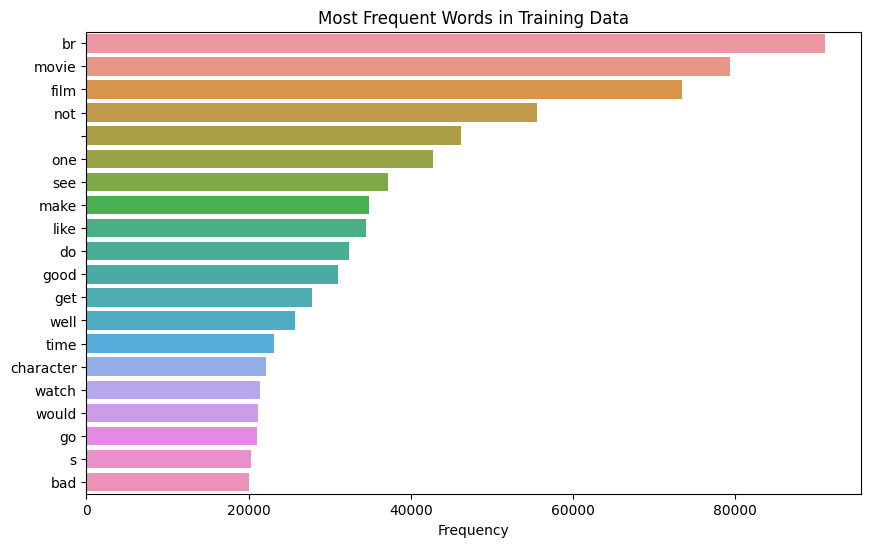

In [8]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Get all tokens from the training set
all_tokens = [word for tokens in train_data['tokens'] for word in tokens]

# Get word frequencies
word_freq = Counter(all_tokens)
most_common_words = word_freq.most_common(20)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=[item[1] for item in most_common_words], y=[item[0] for item in most_common_words])
plt.title("Most Frequent Words in Training Data")
plt.xlabel("Frequency")
plt.show()


#### Visualizing most frequent bigrams

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


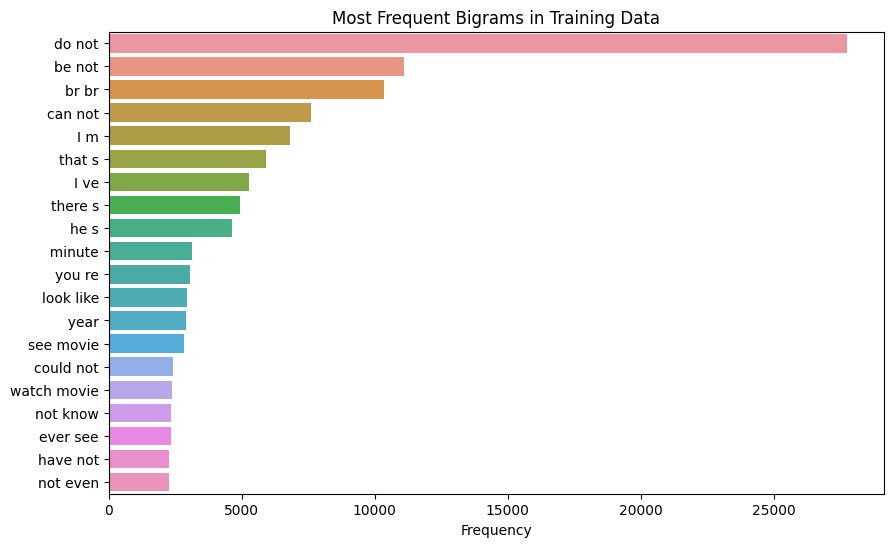

In [9]:
from nltk import bigrams

# Get all bigrams
all_bigrams = list(bigrams(all_tokens))
bigram_freq = Counter(all_bigrams)
most_common_bigrams = bigram_freq.most_common(20)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=[item[1] for item in most_common_bigrams], y=[" ".join(item[0]) for item in most_common_bigrams])
plt.title("Most Frequent Bigrams in Training Data")
plt.xlabel("Frequency")
plt.show()


#### Visulaizing words representing positive and negative sentiments

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


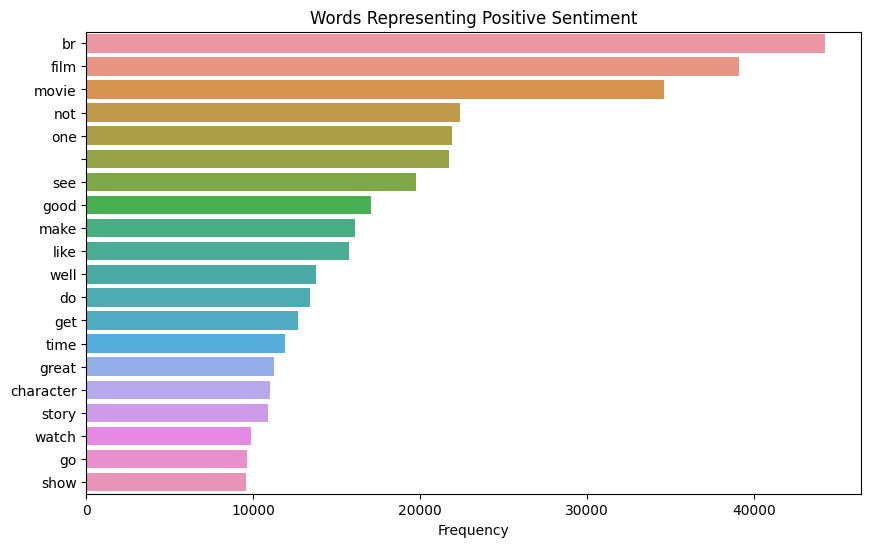

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


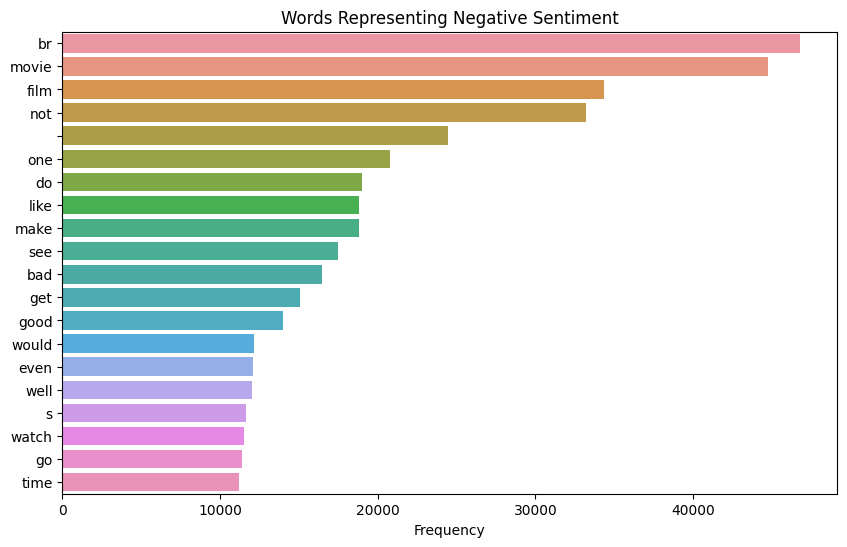

In [10]:
# Separate tokens by sentiment
positive_words = [word for tokens in train_data[train_data['label'] == 1]['tokens'] for word in tokens]
negative_words = [word for tokens in train_data[train_data['label'] == 0]['tokens'] for word in tokens]

# Get word frequencies
positive_freq = Counter(positive_words).most_common(20)
negative_freq = Counter(negative_words).most_common(20)

# Plot positive words
plt.figure(figsize=(10, 6))
sns.barplot(x=[item[1] for item in positive_freq], y=[item[0] for item in positive_freq])
plt.title("Words Representing Positive Sentiment")
plt.xlabel("Frequency")
plt.show()

# Plot negative words
plt.figure(figsize=(10, 6))
sns.barplot(x=[item[1] for item in negative_freq], y=[item[0] for item in negative_freq])
plt.title("Words Representing Negative Sentiment")
plt.xlabel("Frequency")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


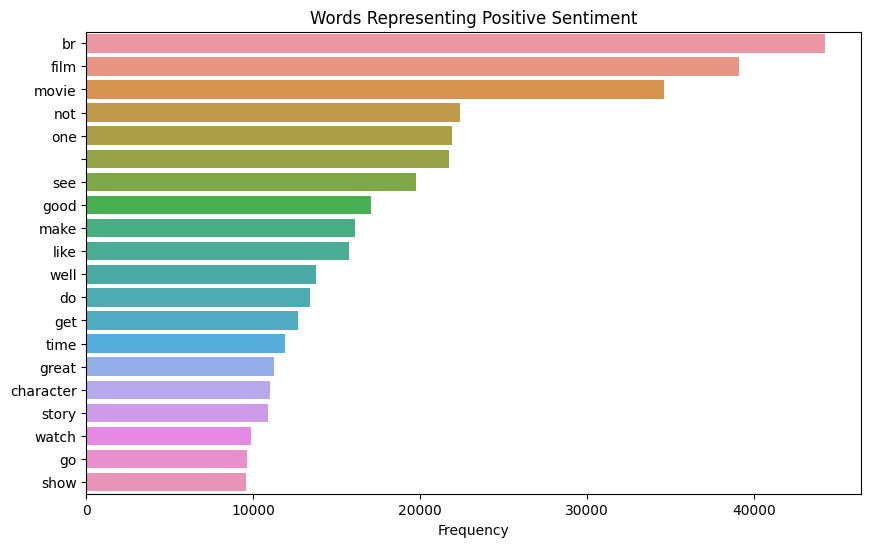

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


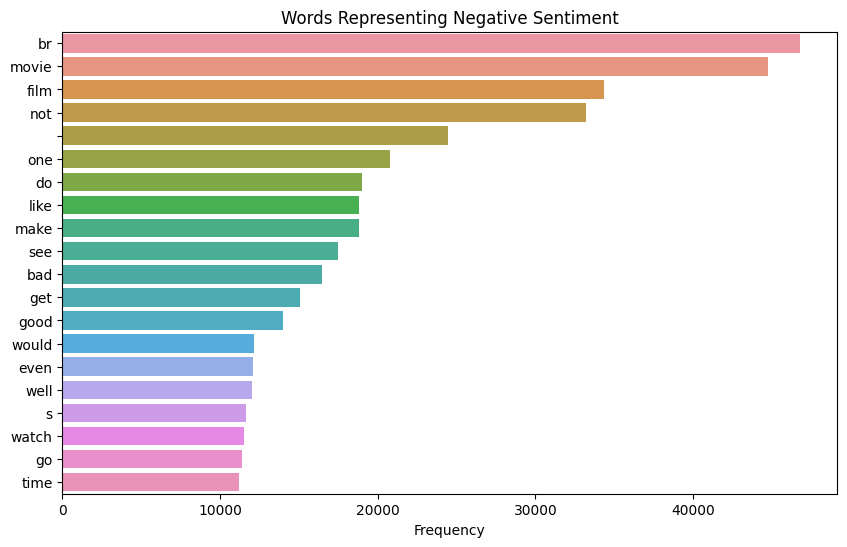

In [11]:
# Separate tokens by sentiment
positive_words = [word for tokens in train_data[train_data['label'] == 1]['tokens'] for word in tokens]
negative_words = [word for tokens in train_data[train_data['label'] == 0]['tokens'] for word in tokens]

# Get word frequencies
positive_freq = Counter(positive_words).most_common(20)
negative_freq = Counter(negative_words).most_common(20)

# Plot positive words
plt.figure(figsize=(10, 6))
sns.barplot(x=[item[1] for item in positive_freq], y=[item[0] for item in positive_freq])
plt.title("Words Representing Positive Sentiment")
plt.xlabel("Frequency")
plt.show()

# Plot negative words
plt.figure(figsize=(10, 6))
sns.barplot(x=[item[1] for item in negative_freq], y=[item[0] for item in negative_freq])
plt.title("Words Representing Negative Sentiment")
plt.xlabel("Frequency")
plt.show()


In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
vocab_size = 10000  # Set a vocab size limit
max_length = 200    # Set max sequence length for padding

# Tokenize and convert to sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_data['text'])
train_sequences = tokenizer.texts_to_sequences(train_data['text'])
test_sequences = tokenizer.texts_to_sequences(test_data['text'])
valid_sequences = tokenizer.texts_to_sequences(valid_data['text'])

# Pad sequences
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')
valid_padded = pad_sequences(valid_sequences, maxlen=max_length, padding='post')

# Labels
train_labels = train_data['label'].values
test_labels = test_data['label'].values
valid_labels = valid_data['label'].values


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Bidirectional, Dense

# Embedding layer parameters
embedding_dim = 64

# 3-layer LSTM Model
def create_lstm_model():
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_length),
        LSTM(64, return_sequences=True),
        LSTM(32, return_sequences=True),
        LSTM(16),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 3-layer GRU Model
def create_gru_model():
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_length),
        GRU(64, return_sequences=True),
        GRU(32, return_sequences=True),
        GRU(16),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 5-layer Bidirectional RNN Model
def create_bidirectional_rnn_model():
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_length),
        Bidirectional(LSTM(64, return_sequences=True)),
        Bidirectional(LSTM(32, return_sequences=True)),
        Bidirectional(LSTM(16, return_sequences=True)),
        Bidirectional(LSTM(8, return_sequences=True)),
        Bidirectional(LSTM(4)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [16]:
import matplotlib.pyplot as plt

def train_and_plot(model, train_data, train_labels, valid_data, valid_labels, epochs=10):
    history = model.fit(train_data, train_labels, epochs=epochs, validation_data=(valid_data, valid_labels), verbose=1)
    
    # Plot accuracy and loss curves
    plt.figure(figsize=(14, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()
    
    return history


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.5016 - loss: 0.6940 - val_accuracy: 0.5088 - val_loss: 0.6931
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.5027 - loss: 0.6927 - val_accuracy: 0.5082 - val_loss: 0.6912
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.6254 - loss: 0.6245 - val_accuracy: 0.8478 - val_loss: 0.3603
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.8883 - loss: 0.2875 - val_accuracy: 0.8758 - val_loss: 0.2953
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9252 - loss: 0.2052 - val_accuracy: 0.8828 - val_loss: 0.3102
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.9475 - loss: 0.1554 - val_accuracy: 0.8856 - val_loss: 0.3104
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9664 - loss: 0.1130 - val_accuracy: 0.8770 - val_loss: 0.3542
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9772 -

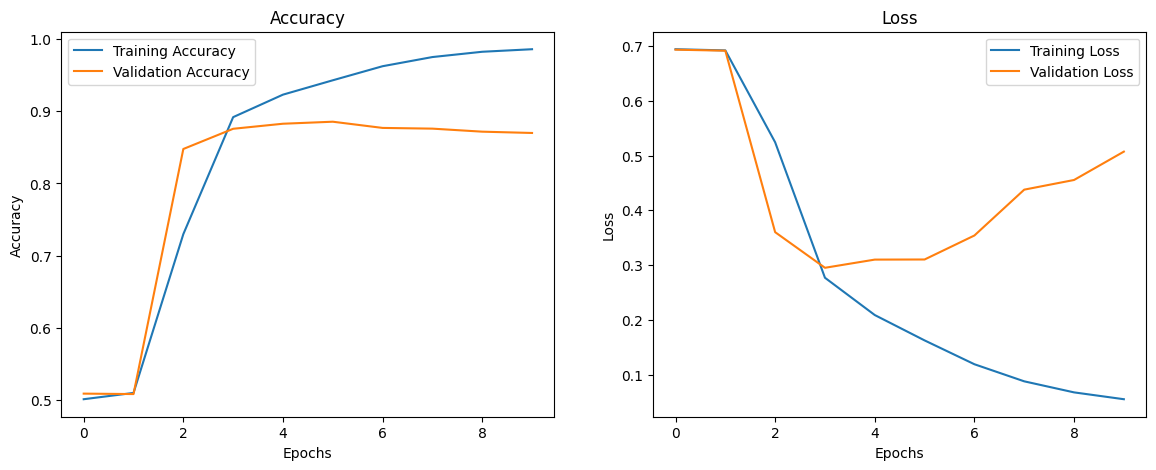

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.5053 - loss: 0.6934 - val_accuracy: 0.5028 - val_loss: 0.6934
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.5521 - loss: 0.6600 - val_accuracy: 0.8776 - val_loss: 0.3027
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.8992 - loss: 0.2582 - val_accuracy: 0.8950 - val_loss: 0.2719
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9410 - loss: 0.1657 - val_accuracy: 0.8900 - val_loss: 0.2860
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9679 - loss: 0.1031 - val_accuracy: 0.8876 - val_loss: 0.3312
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9812 - loss: 0.0684 - val_accuracy: 0.8814 - val_loss: 0.3883
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9895 - loss: 0.0457 - val_accuracy: 0.8778 - val_loss: 0.4513
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9917 -

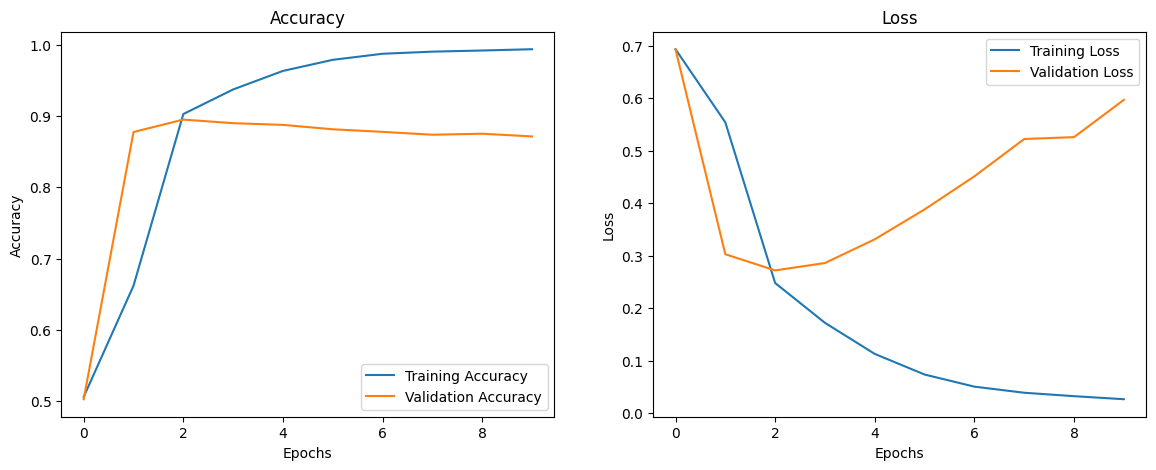

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 61ms/step - accuracy: 0.7498 - loss: 0.5132 - val_accuracy: 0.8558 - val_loss: 0.3547
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 74s 59ms/step - accuracy: 0.8595 - loss: 0.3447 - val_accuracy: 0.8570 - val_loss: 0.3381
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 74s 59ms/step - accuracy: 0.8976 - loss: 0.2757 - val_accuracy: 0.8752 - val_loss: 0.3205
Epoch 4/10
 513/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9537 - loss: 0.1385

In [ ]:
# Train LSTM model
lstm_model = create_lstm_model()
lstm_history = train_and_plot(lstm_model, train_padded, train_labels, valid_padded, valid_labels)

# Train GRU model
gru_model = create_gru_model()
gru_history = train_and_plot(gru_model, train_padded, train_labels, valid_padded, valid_labels)

# Train Bidirectional RNN model
bidirectional_rnn_model = create_bidirectional_rnn_model()
bidirectional_rnn_history = train_and_plot(bidirectional_rnn_model, train_padded, train_labels, valid_padded, valid_labels)


In [18]:
lstm_test_loss, lstm_test_accuracy = lstm_model.evaluate(test_padded, test_labels)
gru_test_loss, gru_test_accuracy = gru_model.evaluate(test_padded, test_labels)
bidirectional_rnn_test_loss, bidirectional_rnn_test_accuracy = bidirectional_rnn_model.evaluate(test_padded, test_labels)

results = pd.DataFrame({
    "Model": ["3-layer LSTM", "3-layer GRU", "5-layer Bidirectional RNN"],
    "Test Accuracy": [lstm_test_accuracy, gru_test_accuracy, bidirectional_rnn_test_accuracy]
})

print(results)


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8689 - loss: 0.5006
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8741 - loss: 0.5886
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.8745 - loss: 0.4801
                       Model  Test Accuracy
0               3-layer LSTM         0.8720
1                3-layer GRU         0.8756
2  5-layer Bidirectional RNN         0.8716


### Conclusion:
- The 3-layer GRU model achieved the highest test accuracy of 0.8756, indicating it performs slightly better than the LSTM and Bidirectional RNN models on your test data.
- The 3-layer LSTM performed well, with an accuracy of 0.8720, which is comparable but slightly lower than the GRU.
- The 5-layer Bidirectional RNN had the lowest test accuracy of 0.8716, which may suggest that increasing the layer count does not necessarily yield better performance in this case.